### Introduction to Neural Networks in Tensorflow

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)


2.13.0


### Creating data to view and fit

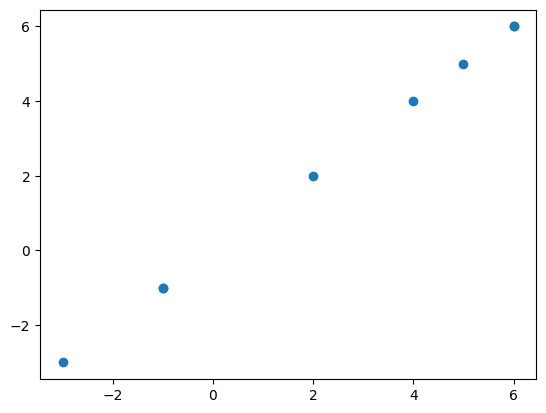

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-1.0,-3.0,-1.0,5,6,4,6,2])

# Create labels
y = np.array([-1.0,-3.0,-1.0,5,6,4,6,2])

# Visualize it
plt.scatter(X, y)

### Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
 # Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-1., -3., -1.,  5.,  6.,  4.,  6.,  2.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([-1., -3., -1.,  5.,  6.,  4.,  6.,  2.])>)

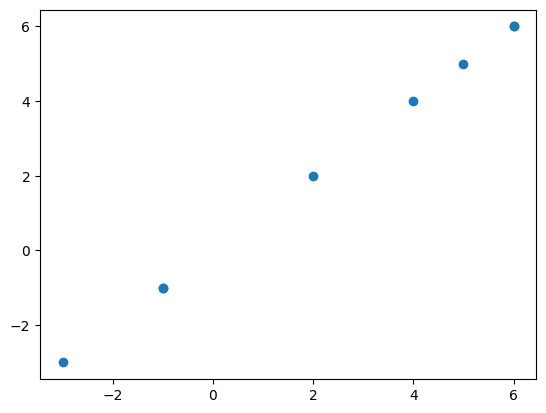

In [5]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** -letting the model try to find patterns between X and y (features and labels)

In [8]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae isshort for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
            metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 244ms/step - loss: 3.2674 - mae: 3.2674
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 3.1442 - mae: 3.1442
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 3.0211 - mae: 3.0211
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 2.8980 - mae: 2.8980
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 2.7749 - mae: 2.7749


In [9]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[4.1174717]], dtype=float32)

🤔 Question: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. tf.keras.layers.Dense())?

Before TensorFlow 2.0+, Keras was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

### Improving our model
How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [10]:
# Let's rebuild the model with epochs=100
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae isshort for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
            metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 195ms/step - loss: 9.0188 - mae: 9.0188
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8956 - mae: 8.8956
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7725 - mae: 8.7725
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 8.6494 - mae: 8.6494
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 8.5263 - mae: 8.5263
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4031 - mae: 8.4031
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2800 - mae: 8.2800
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1569 - mae: 8.1569
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.0338 - mae: 8.0338
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9106 - mae: 7.9106
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.787

In [11]:
# Let's see if our model's prediction has improved
y_pred2 = model.predict([17.0])
y_pred2

1/1 [==============================] - 0s 44ms/step


array([[16.824627]], dtype=float32)

Much better!

We got closer this time. But we could still be better.

Now we've trained a model, how could we evaluate it?

### Evaluating a model

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [13]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [14]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

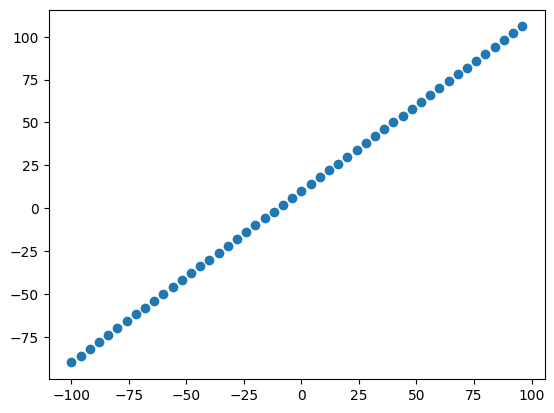

In [15]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)